In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
flights = pd.read_csv('Datasets/flight/Clean_Dataset.csv')
flights.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
flights.shape

(300153, 12)

In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
flights.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
flights.duplicated().sum()

0

In [7]:
flights.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


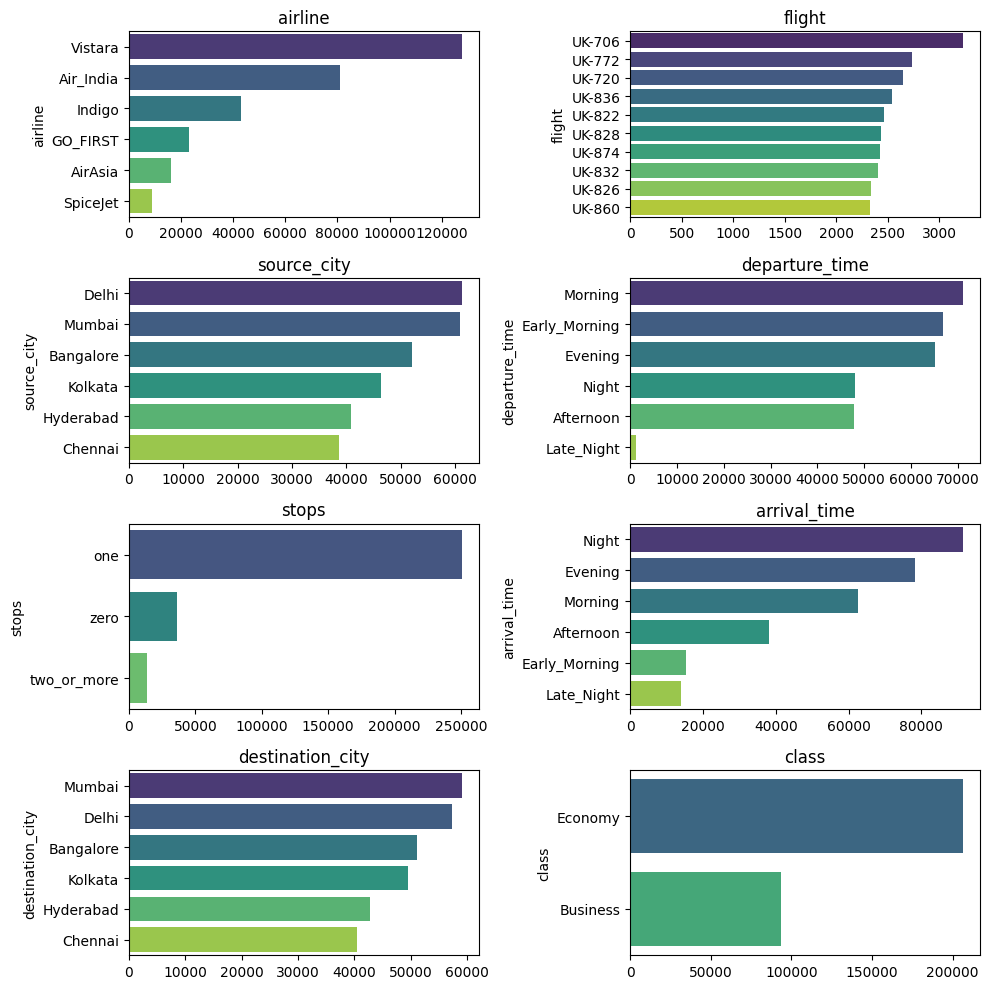

In [8]:
plt.figure(figsize=(10,10))
for i , feature in enumerate(flights.select_dtypes(include='object').columns):
    counts = flights[feature].value_counts().head(10)
    plt.subplot(4,2,i+1)
    sns.barplot(x=counts.values, y=counts.index, palette = "viridis")
    plt.title(f"{feature}")

plt.tight_layout()

In [9]:
economy_df = flights[flights['class'] == "Economy"]
business_df = flights[flights['class'] == "Business"]

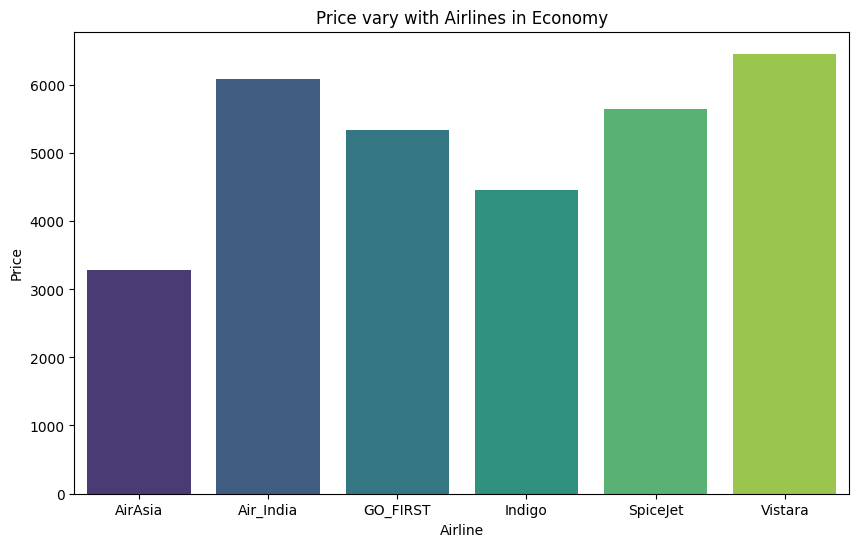

In [10]:
price_in_economy = economy_df.groupby("airline")["price"].median()
plt.figure(figsize=(10,6))
sns.barplot(x=price_in_economy.index, y=price_in_economy.values, palette='viridis')
plt.title("Price vary with Airlines in Economy")
plt.xlabel("Airline")
plt.ylabel("Price")
plt.show()

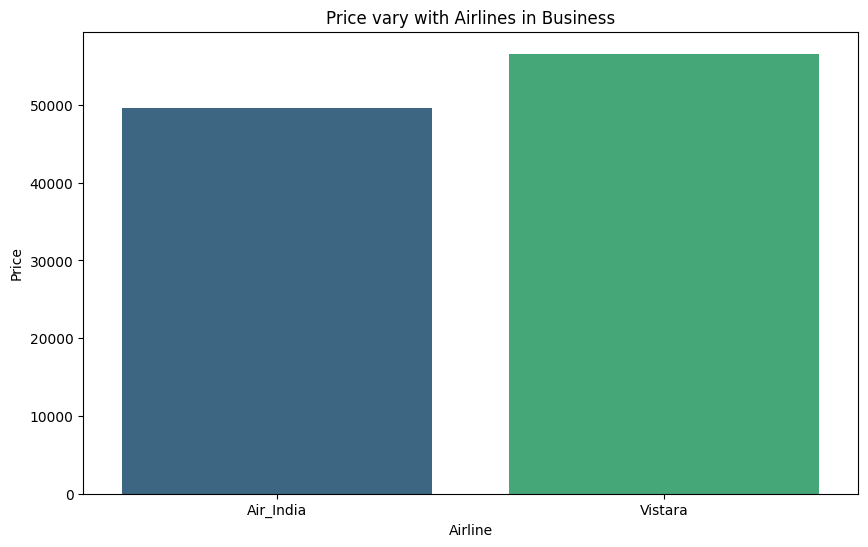

In [11]:
price_in_business = business_df.groupby("airline")["price"].median()
plt.figure(figsize=(10,6))
sns.barplot(x=price_in_business.index, y=price_in_business.values, palette='viridis')
plt.title("Price vary with Airlines in Business")
plt.xlabel("Airline")
plt.ylabel("Price")
plt.show()

In [12]:
one_day = flights[(flights['days_left']==1) & (flights['class']=='Economy')]['price'].median()

In [13]:
two_day = flights[(flights['days_left']==2) & (flights['class']=='Economy')]['price'].median()

In [14]:
twenty_five_day = flights[(flights['days_left']==25) & (flights['class']=='Economy')]['price'].median()

In [15]:
print("The median price when tickets are bought in just 1 day before departure: ", one_day)
print("The median price when tickets are bought in just 2 day before departure: ", two_day)
print("The median price when tickets are bought in just 25 day before departure: ", twenty_five_day)

The median price when tickets are bought in just 1 day before departure:  14150.0
The median price when tickets are bought in just 2 day before departure:  13212.0
The median price when tickets are bought in just 25 day before departure:  4979.0


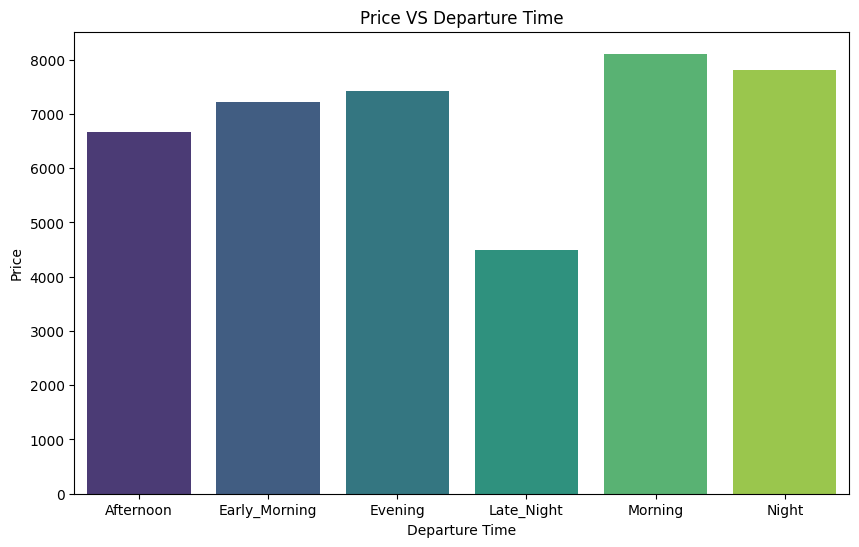

In [16]:
departure_time = flights.groupby("departure_time")["price"].median()
plt.figure(figsize=(10, 6))
sns.barplot(x=departure_time.index, y=departure_time.values, palette="viridis")
plt.title("Price VS Departure Time")
plt.xlabel("Departure Time")
plt.ylabel("Price")
plt.show()

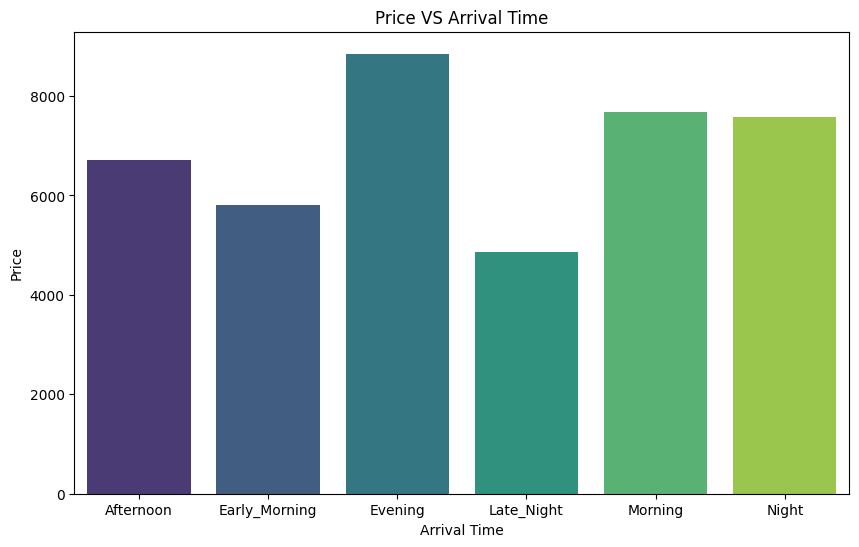

In [17]:
arrival_time = flights.groupby("arrival_time")["price"].median()

plt.figure(figsize=(10, 6))
sns.barplot(x=arrival_time.index, y=arrival_time.values, palette="viridis")
plt.title("Price VS Arrival Time")
plt.xlabel("Arrival Time")
plt.ylabel("Price")
plt.show()

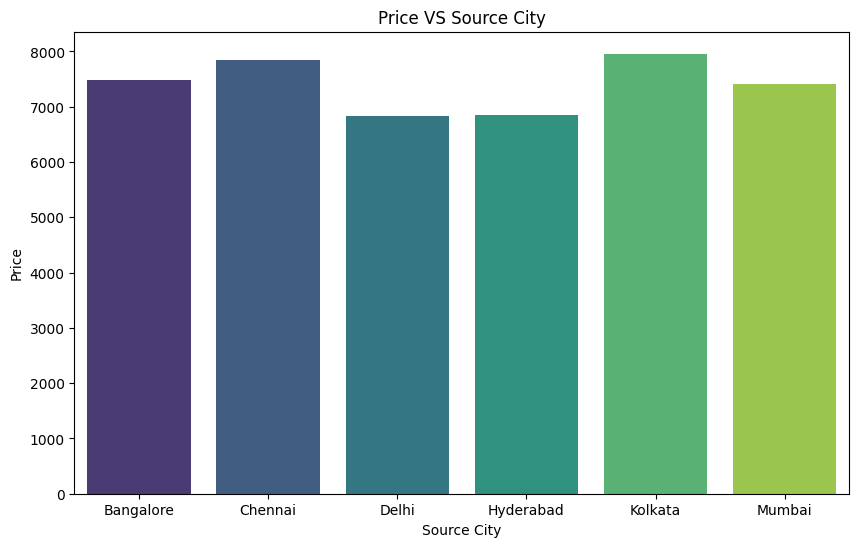

In [18]:
source_city = flights.groupby("source_city")["price"].median()
plt.figure(figsize=(10, 6))
sns.barplot(x=source_city.index, y=source_city.values, palette="viridis")
plt.title("Price VS Source City")
plt.xlabel("Source City")
plt.ylabel("Price")
plt.show()

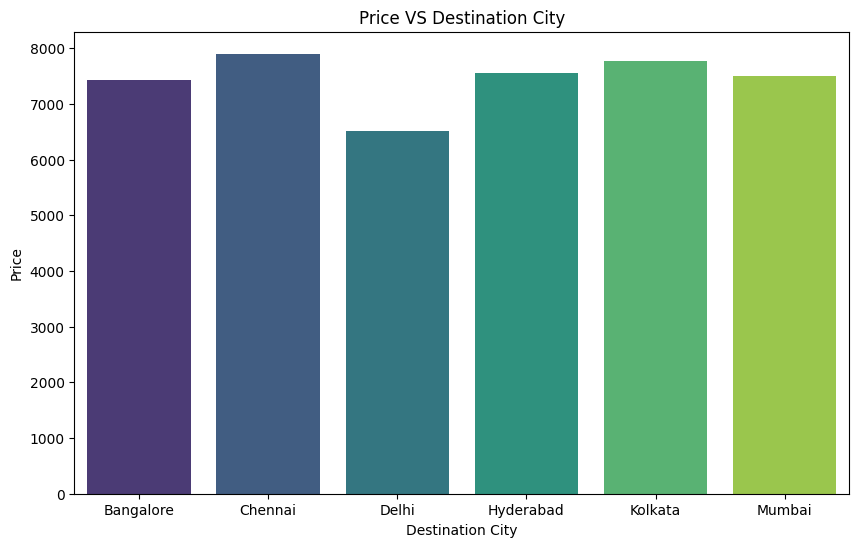

In [19]:
destination_city = flights.groupby("destination_city")["price"].median()
plt.figure(figsize=(10, 6))
sns.barplot(x=destination_city.index, y=destination_city.values, palette="viridis")
plt.title("Price VS Destination City")
plt.xlabel("Destination City")
plt.ylabel("Price")
plt.show()

In [20]:
economy_price = flights[flights['class']=="Economy"]["price"].median()
business_price = flights[flights['class']=="Business"]["price"].median()

In [21]:
print("The Median Price in Economy: ", economy_price)
print("The Median Price in Business: ", business_price)

The Median Price in Economy:  5772.0
The Median Price in Business:  53164.0


In [22]:
encoder = LabelEncoder()

flights["airline"] = encoder.fit_transform(flights["airline"])
flights["source_city"] = encoder.fit_transform(flights["source_city"])
flights["departure_time"] = encoder.fit_transform(flights["departure_time"])
flights["stops"] = encoder.fit_transform(flights["stops"])
flights["arrival_time"] = encoder.fit_transform(flights["arrival_time"])
flights["destination_city"] = encoder.fit_transform(flights["destination_city"])
flights["class"] = encoder.fit_transform(flights["class"])

In [23]:
flights.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,4,SG-8709,2,2,2,5,5,1,2.17,1,5953
1,1,4,SG-8157,2,1,2,4,5,1,2.33,1,5953
2,2,0,I5-764,2,1,2,1,5,1,2.17,1,5956
3,3,5,UK-995,2,4,2,0,5,1,2.25,1,5955
4,4,5,UK-963,2,4,2,4,5,1,2.33,1,5955


In [24]:
flights.drop(columns=['Unnamed: 0', 'flight'], axis=1, inplace=True)

In [25]:
flights.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


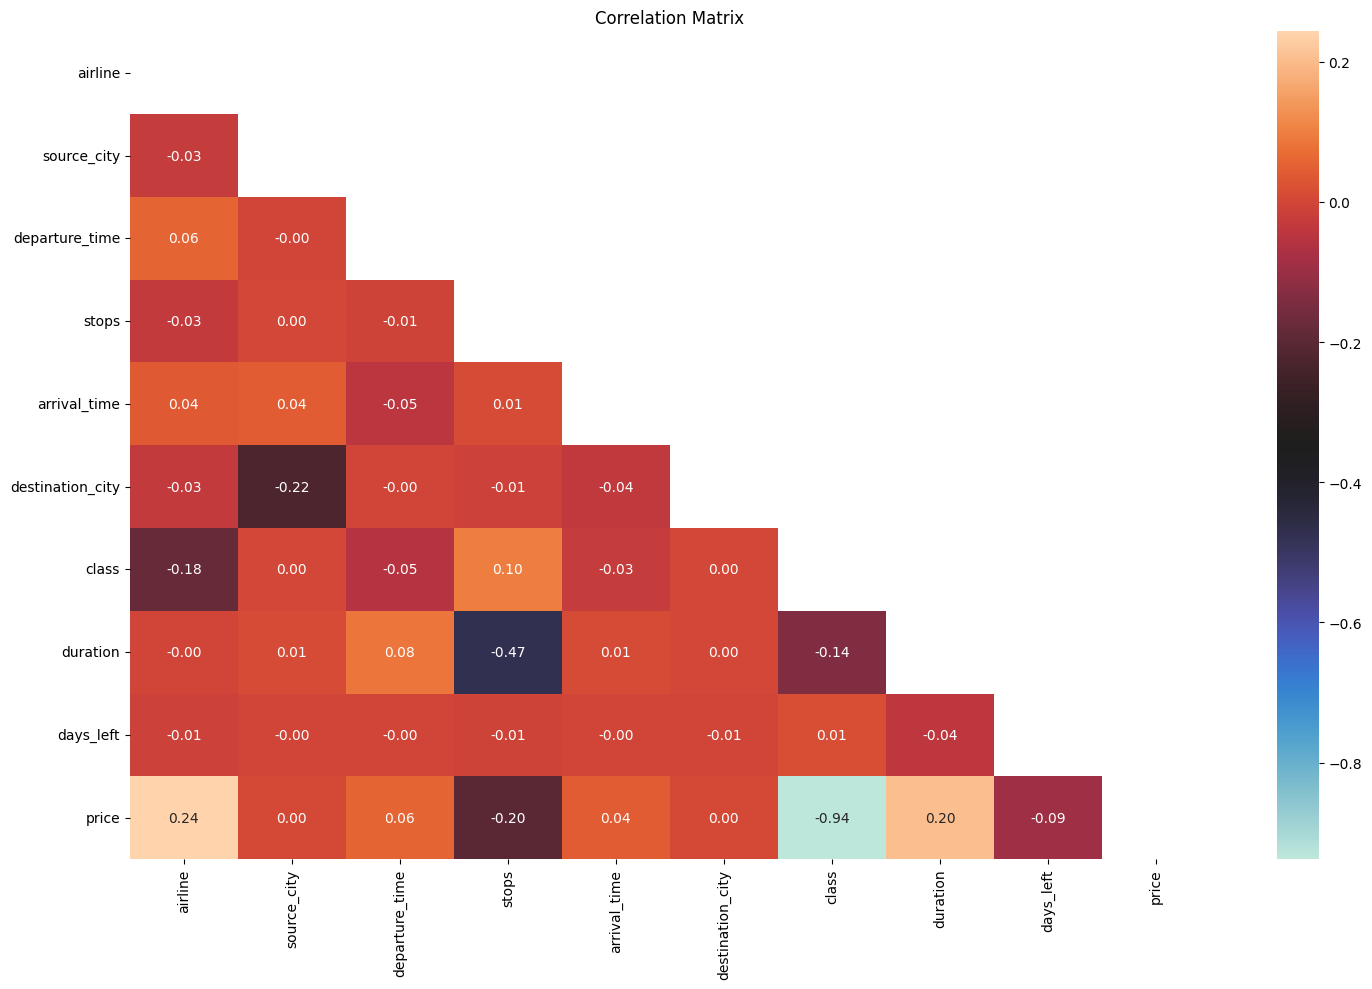

In [26]:
corr = flights.corr()
mask_ut = np.triu(np.ones(corr.shape)).astype(np.bool_)

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="icefire", mask=mask_ut)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

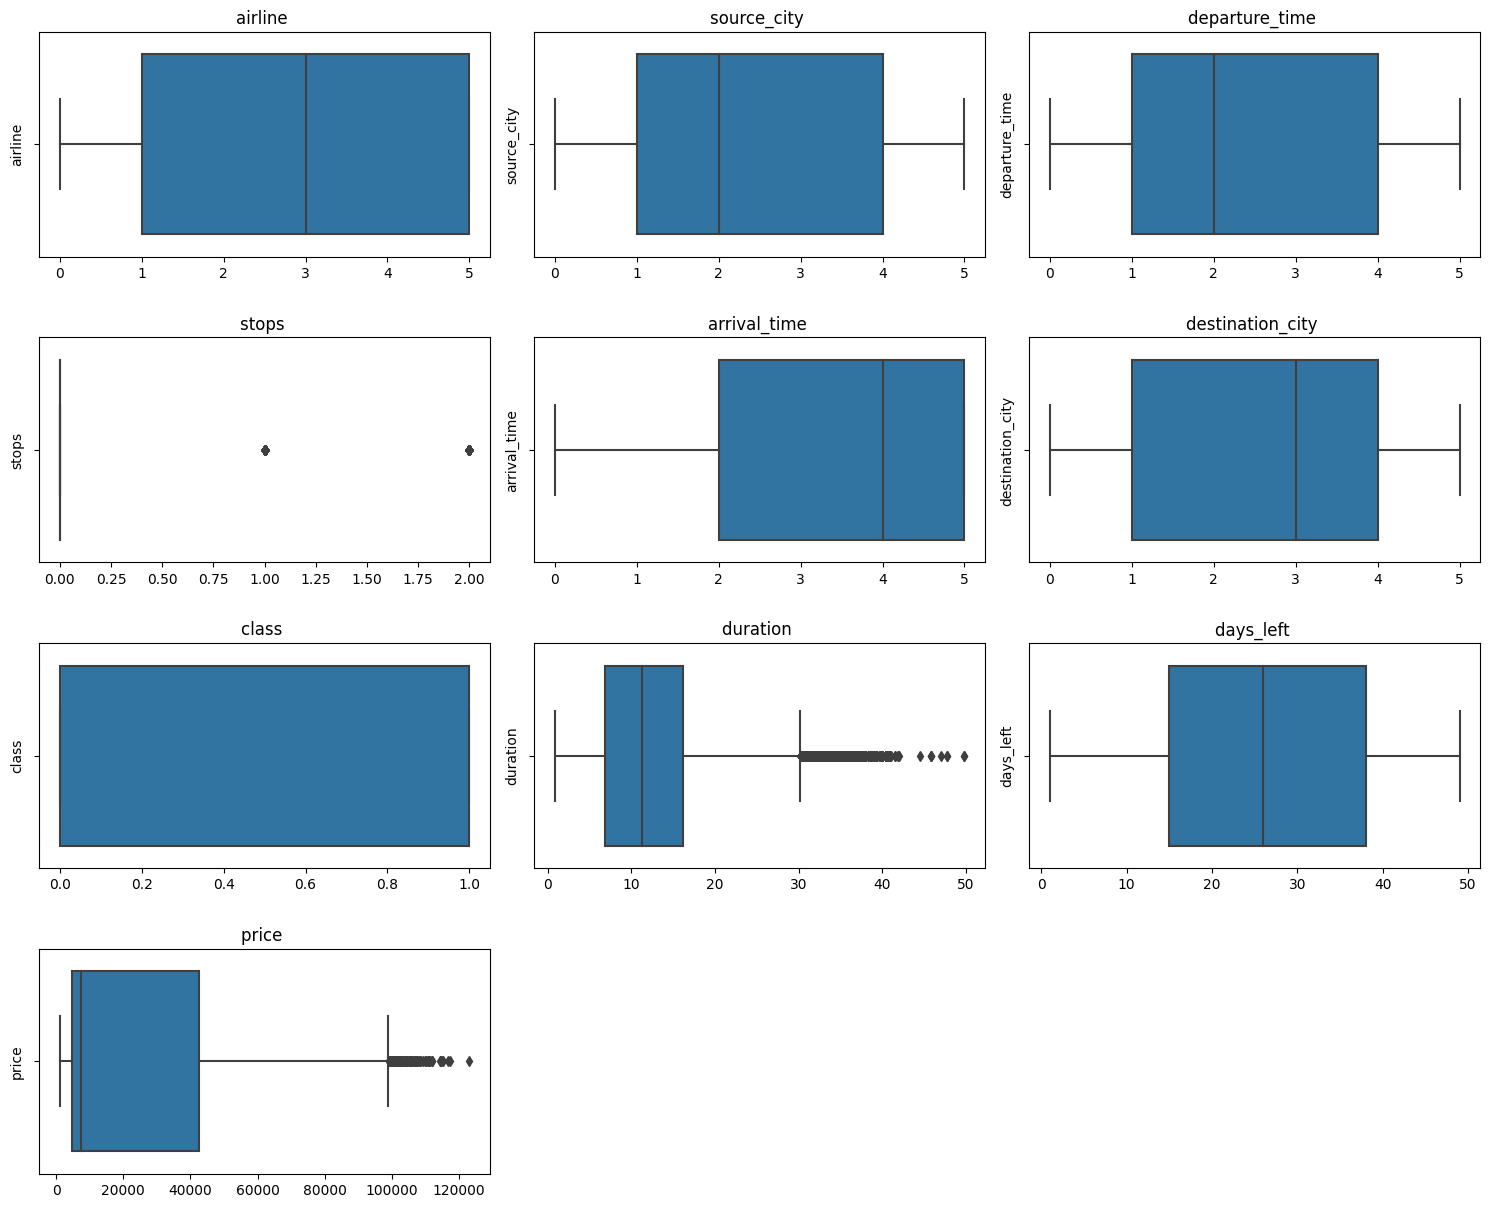

In [27]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(flights.columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(data=flights, x=feature)
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()

In [28]:
q1 = flights["duration"].quantile(0.25)
q3 = flights["duration"].quantile(0.75)
iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

flights = flights.loc[(flights["duration"] < upper_limit) & (flights["duration"] > lower_limit)]

In [29]:
X = flights.drop("price", axis=1)
y = flights["price"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred= lin_reg.predict(X_test)

In [33]:
print("MAE: ", mean_absolute_error(y_test, y_pred))

MAE:  4663.419841292174


In [34]:
print("R2-score: ", f"{(r2_score(y_test, y_pred) * 100):0.1f}", "%")

R2-score:  90.5 %
